# MA332 Project 1: Numerical Root Finding

Newton's Method
$$
x_{n+1} = x_n - \frac{f(x_n)}{f^\prime(x_n)}
$$

In [13]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import sys

# set colormap
cmap=matplotlib.colormaps['Set3']

## Define Newton's Method:

In [3]:
def newton(f, df, x, iter=1000, tol=1e-3):
    ''' Finds the root of function f with derivative df using Newton's method starting at x'''
    
    x_n = []  # list to hold guesses
    
    for i in range(iter):
        
        x_n.append(x)
        prev_x = x

        # update approximation
        try: x = x - f(x)/df(x)
        except ZeroDivisionError:
            return None

        if abs(x - prev_x) < tol: # check stopping condition
            return x_n  

    return x_n

## Real-valued Functions:

#### $ g(x) = (x - 1)(x + 3) $:

First define $ g(x) $ and $ \frac{dg(x)}{dx} $:

In [44]:
def g(x): return (x - 1)*(x + 3)

def dg(x): return (x - 1) + (x + 3)

Create an array of x samples to use as starting points for Newton's Method:

In [45]:
x = np.linspace(-4, 2, 100)
y = g(x)

Find roots starting at each point:

In [46]:
roots  = []
for i in range(100):
    approx = newton(g, dg, x[i])
    roots.append(round(approx[-1], 2))

# copy of roots array with first and last values removed
trimmed = np.empty(98)
trimmed = roots[1:-1]

Plot basins of convergence:

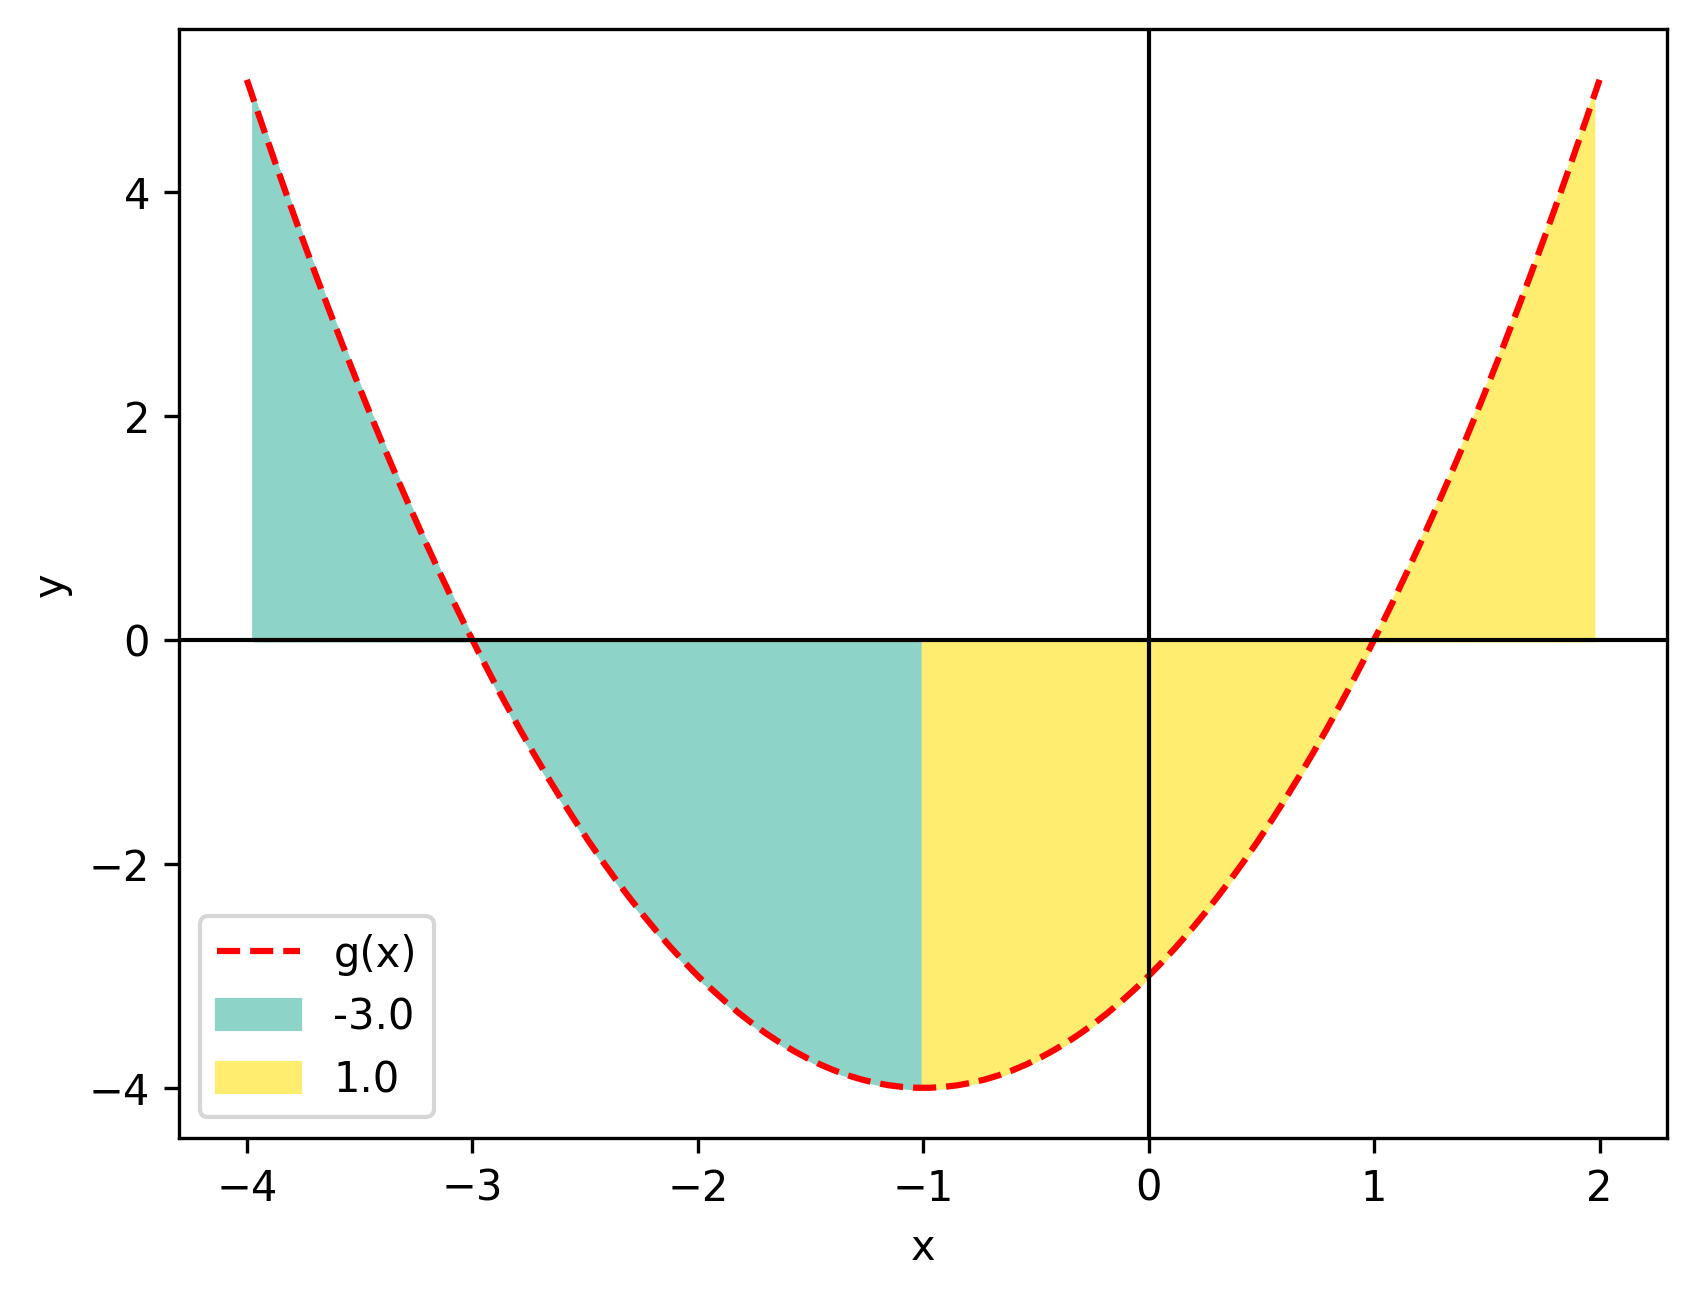

In [47]:
colors = cmap(roots)

# find the first x value that led to each root
_, root_indices = np.unique(trimmed, return_index=True)

# correct for using trimmed roots
root_indices += 1

fig, axes = plt.subplots(dpi=300)
axes.plot(x, y, 'r--',label='g(x)')

# for each starting x (except endpoints)
for i in range(1, len(roots)-1):

    fill_x = [(x[i-1] + x[i])/2, (x[i] + x[i+1])/2]
    fill_y = [(y[i-1] + y[i])/2, (y[i] + y[i+1])/2]

    axes.fill_between(fill_x, fill_y, 0, color=colors[i], label=roots[i] if i in root_indices else "")

# draw x and y axis
axes.axvline(color='Black', lw=1)
axes.axhline(color='Black', lw=1)

# label axes
axes.set_xlabel('x')
axes.set_ylabel('y')

axes.legend()

# save and display figure
plt.savefig('Report/figures/figure1.png')
plt.show()

#### $ h(x) = (x - 4)(x - 1)(x + 3) $:

First define $ h(x) $ and $ \frac{dh(x)}{dx} $:

In [3]:
def h(x): return (x - 4)*(x - 1)*(x + 3)

def dh(x): return (x - 4)*(x - 1) + (x - 1)*(x + 3) + (x - 4)*(x + 3)

Create an array of x samples to use as starting points for Newton's Method:

In [49]:
x = np.linspace(-4, 5, 1000)
y = h(x)

Find roots starting at each point:

In [50]:
roots  = []
for i in range(1000):
    approx = newton(h, dh, x[i])
    roots.append(round(approx[-1], 2))

norm = matplotlib.colors.Normalize()
norm.autoscale(roots)
norm_roots = norm(roots)
colors = cmap(norm_roots)

# copy of roots array with first and last values removed
trimmed = np.empty(998)
trimmed = roots[1:-1]

[-3.  1.  4.] [  1 358 293]


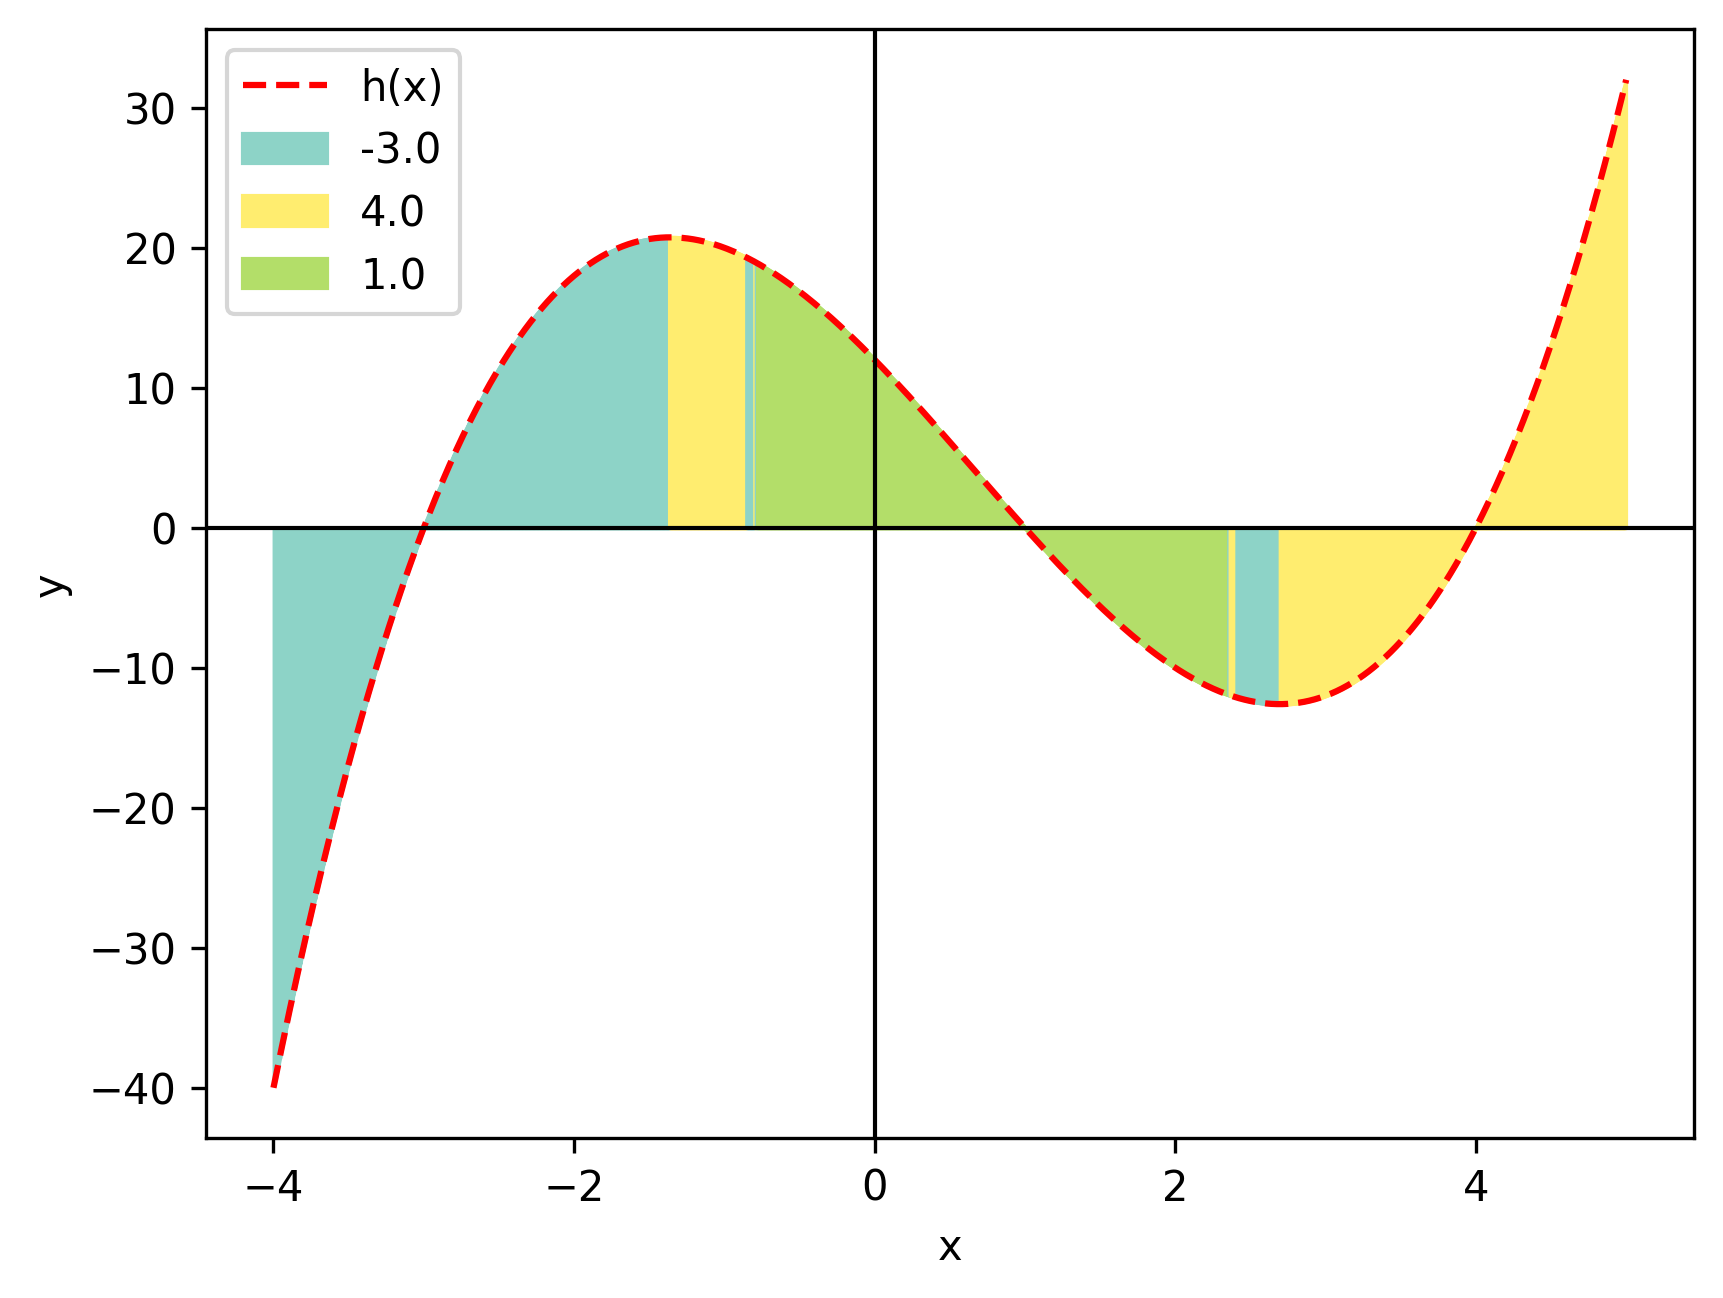

In [51]:
# find the first x value that led to each root
_, root_indices = np.unique(trimmed, return_index=True)

# correct for using trimmed roots
root_indices += 1
print(_, root_indices)

fig, axes = plt.subplots(dpi=300)
axes.plot(x, y, 'r--',label='h(x)')

# for each starting x (except endpoints)
for i in range(1, len(roots)-1):

    fill_x = [(x[i-1] + x[i])/2, (x[i] + x[i+1])/2]
    fill_y = [(y[i-1] + y[i])/2, (y[i] + y[i+1])/2]

    axes.fill_between(fill_x, fill_y, 0, color=colors[i], label=roots[i] if i in root_indices else "")

# draw x and y axis
axes.axvline(color='Black', lw=1)
axes.axhline(color='Black', lw=1)
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.legend()
plt.savefig('Report/figures/figure2.png')
plt.show()

In [52]:
x = np.linspace(-0.87, -0.75, 1000)
y = h(x)

In [53]:
cmap=matplotlib.colormaps['Set3']
roots  = []
for i in range(1000):
    approx = newton(h, dh, x[i])
    roots.append(round(approx[-1], 2))

norm = matplotlib.colors.Normalize()
norm.autoscale(roots)
norm_roots = norm(roots)
colors = cmap(norm_roots)

# copy of roots array with first and last values removed
trimmed = np.empty(998)
trimmed = roots[1:-1]

[-3.  1.  4.] [176 725   1]


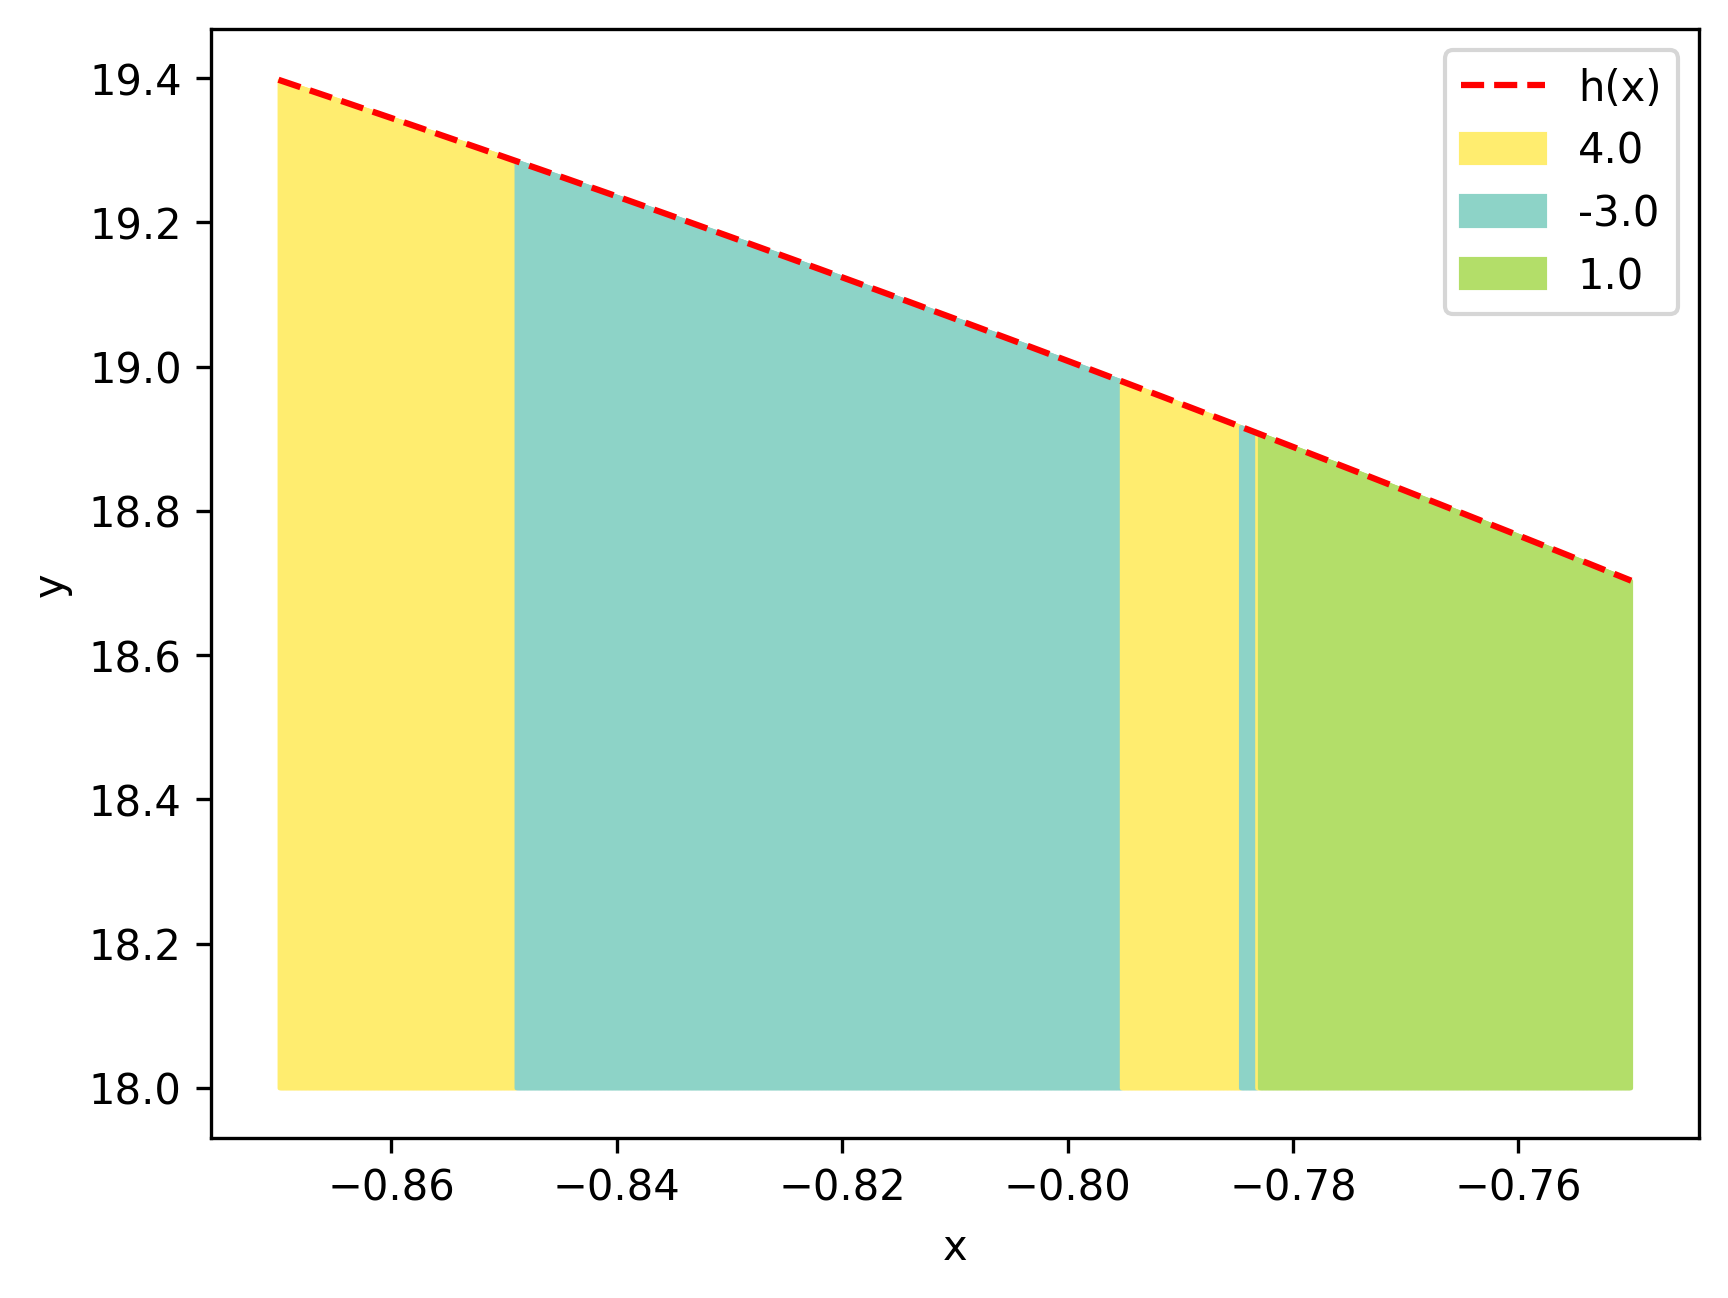

In [54]:
# find the first x value that led to each root
_, root_indices = np.unique(trimmed, return_index=True)

# correct for using trimmed roots
root_indices += 1
print(_, root_indices)

fig, axes = plt.subplots(dpi=300)
axes.plot(x, y, 'r--',label='h(x)')

# for each starting x (except endpoints)
for i in range(1, len(roots)-1):

    fill_x = [(x[i-1] + x[i])/2, (x[i] + x[i+1])/2]
    fill_y = [(y[i-1] + y[i])/2, (y[i] + y[i+1])/2]

    axes.fill_between(fill_x, fill_y, 18, color=colors[i], label=roots[i] if i in root_indices else "")

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.legend()
plt.savefig('Report/figures/figure3.png')
plt.show()

## Complex-valued Functions:

#### $ f(z) = z^3 - 1 $

In [4]:
def f(z): return z**3 - 1

def df(z): return 3*z**2

[-0.5-0.87j -0.5+0.87j  1. -0.j  ] [[  0   0]
 [  0 712]
 [  0 704]]
[0.        +0.00000000e+00j 0.50344208+8.68003592e-01j
 1.        +5.53837686e-17j]


/tmp/ipykernel_3329/2171058859.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
  norm_results = norm(results).astype(float)
/home/ben/.local/lib/python3.10/site-packages/matplotlib/axes/_axes.py:4353: ComplexWarning: Casting complex values to real discards the imaginary part
  c = np.asanyarray(c, dtype=float)


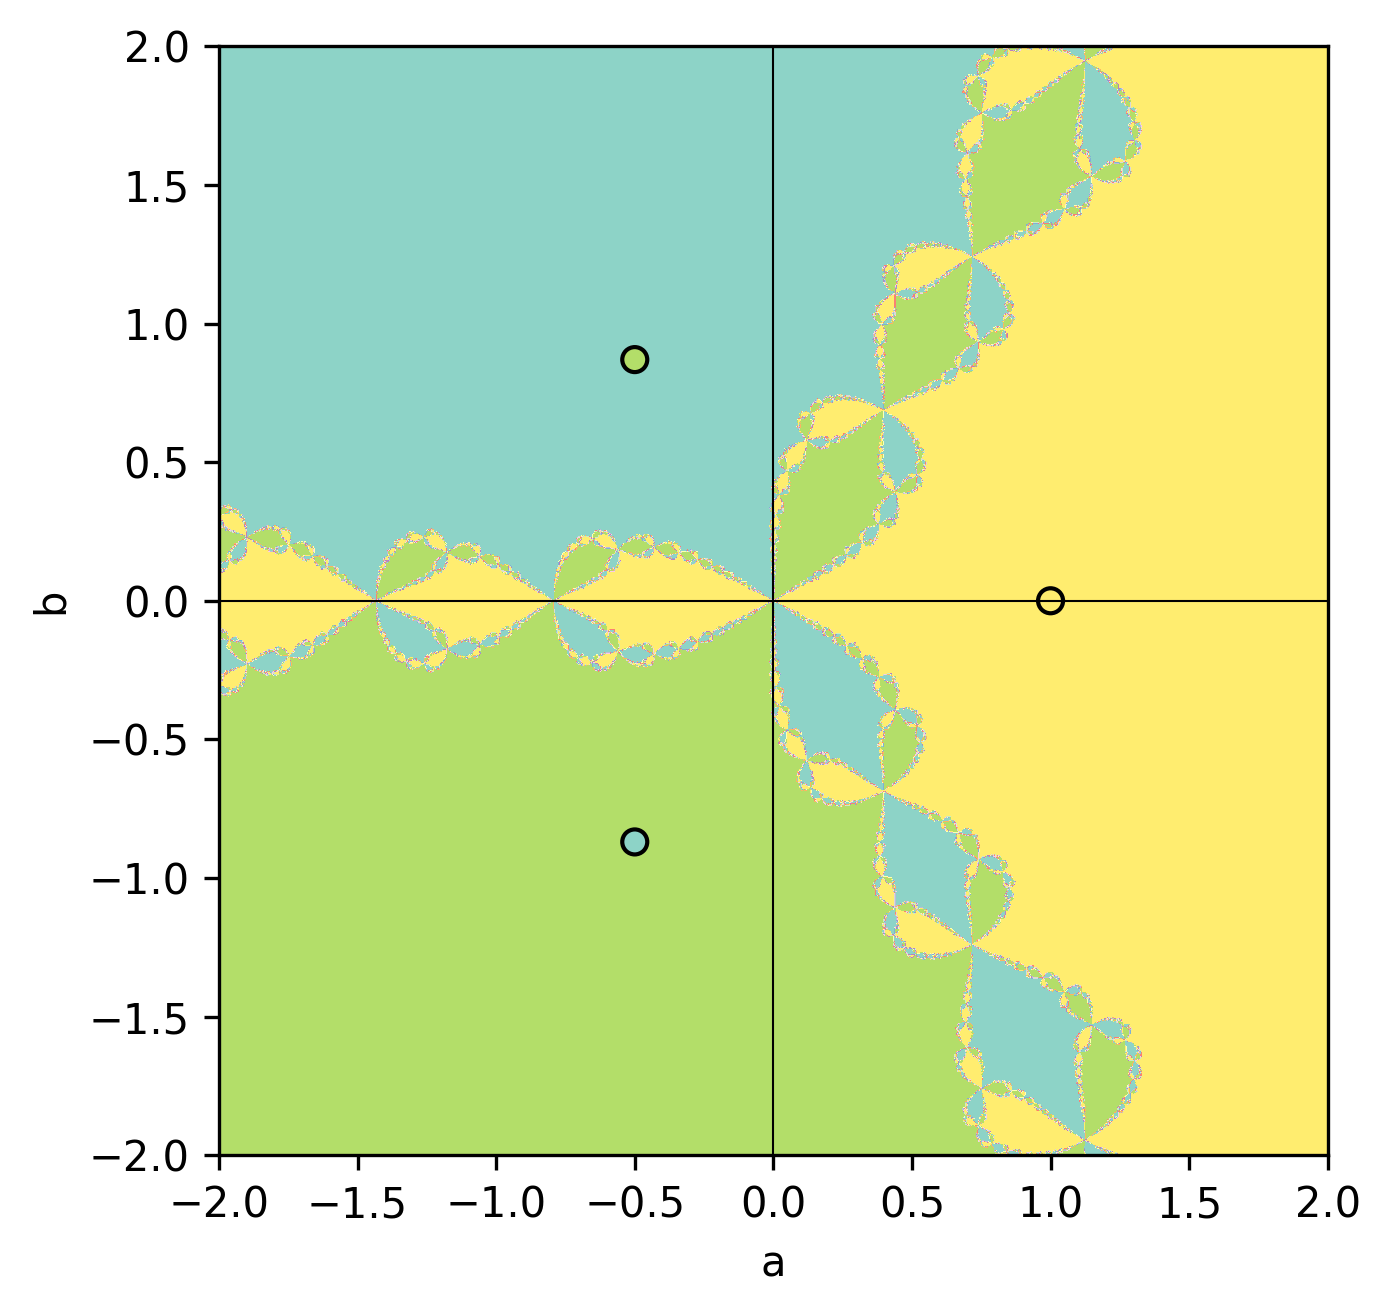

In [12]:
a = np.linspace(-2, 2, 1000)
b = np.linspace(-2j, 2j, 1000)

aa, bb = np.meshgrid(a, b)

results = np.empty((1000, 1000), dtype=complex)

for i in range(1000):
    for j in range(1000):

        results[i][j] = np.round(newton(f, df, aa[i][j] + bb[i][j])[-1], 2)

roots, root_indices = np.unique(results, return_index=True)

root_indices = np.asarray(np.unravel_index(root_indices, (1000, 1000))).T

roots_a_b = np.array([np.real(roots), np.imag(roots)])

print(roots, root_indices)

norm = matplotlib.colors.Normalize()
norm.autoscale(roots)
norm_roots = norm(roots)
norm_results = norm(results).astype(float)
print(norm_roots)
fig, axes = plt.subplots(dpi=300)

axes.imshow(norm_results, cmap='Set3', extent=[-2, 2, -2, 2])
axes.scatter(roots_a_b[0], roots_a_b[1], c=norm(roots), cmap='Set3', marker='o', edgecolors='Black')

axes.axhline(color='Black', lw=0.5)
axes.axvline(color='Black', lw=0.5)
axes.set_xlabel('a')
axes.set_ylabel('b')

plt.savefig('Report/figures/figure4.png')
plt.show()

## Failure to Converge:

In [ ]:
def check_convergence(f, df, x1, x2, n=100, tol=1e-6):

    results = np.empty(n)

    test_x = np.linspace(x1, x2, n)

    for i in range(n):

        results[i] = newton(f, df, test_x[i], tol)

    return test_x, f(test_x), results

In [ ]:
def plot_convergence(axes, f, df, x1, x2, n=100, tol=1e-6):

    x, y, roots = check_convergence(f, df, x1, x2, n, tol)

    axes.plot(x, y)

    axes.axhline(color='Black', lw=1)
    axes.axvline(color='Black', lw=1)

    for i in range(1, len(roots)-1):
        if np.isnan(roots[i]):

            fill_x = [(x[i-1] + x[i])/2, (x[i] + x[i+1])/2]
            fill_y = [(y[i-1] + y[i])/2, (y[i] + y[i+1])/2]

            axes.fill_between(fill_x, fill_y, 0, color='Red')

    print(np.unique(np.asarray(roots)))

In [ ]:
def color_convergence(f, df, x1, x2, n=100, tol=1e-6):

    x, y, roots = check_convergence(f, df, x1, x2, n, tol)

    fig, axes = plt.subplots()

    axes.plot(x, y)

    axes.axhline(color='Black', lw=1)
    axes.axvline(color='Black', lw=1)

    for i in range(1, len(roots)-1):
        print(roots[i])
        if roots[i] == np.nan:

            fill_x = [(x[i-1] + x[i])/2, (x[i] + x[i+1])/2]
            fill_y = [(y[i-1] + y[i])/2, (y[i] + y[i+1])/2]

            axes.fill_between(fill_x, fill_y, 0, color='Red')

    plt.legend()
    plt.show()

In [ ]:
g = lambda x: x**3 - 2*x + 2.01626
dg = lambda x: 3*x**2 - 2

fig, axes = plt.subplots()
plot_convergence(axes, g, dg, -2, 3, n=1000)
plt.show()

In [ ]:
from matplotlib.animation import FuncAnimation

fig, axes = plt.subplots()

def animate(t):
    axes.plot()